In [1]:
import json
from io import StringIO
from popframe.method.landuse_assessment import LandUseAssessment
from popframe.models.region import Region
import geopandas as gpd
from loguru import logger

region_model = Region.from_pickle('data/Ленинградская область.pickle')
landuse = LandUseAssessment(region=region_model)

In [2]:
geojson_data = {
                "type": "Feature",
                "properties": {},
                "geometry": {
                    "coordinates": [
                        [
                            [29.982879431084967, 59.363554752593245],
                            [29.982879431084967, 59.322083801173534],
                            [30.109075699649765, 59.322083801173534],
                            [30.109075699649765, 59.363554752593245],
                            [29.982879431084967, 59.363554752593245],
                        ]
                    ],
                    "type": "Polygon"
                }
            }

In [3]:
territories = json.dumps(geojson_data)
territories_gdf = gpd.read_file(StringIO(territories))
territories_gdf.explore()

In [8]:
territories = gpd.read_file('/Users/mvin/Code/PopFrame/examples/data/grid.geojson')
territories

,geometry
0,"POLYGON ((29.65352 60.75606, 29.69198 60.73276..."
1,"POLYGON ((34.21298 59.70612, 34.24864 59.6808,..."
2,"POLYGON ((30.54114 59.98839, 30.57846 59.96455..."
3,"POLYGON ((34.68571 60.95192, 34.72244 60.92676..."
4,"POLYGON ((34.5092 59.59026, 34.54462 59.5648, ..."
...,...
2143,"POLYGON ((28.90861 60.56897, 28.9471 60.54592,..."
2144,"POLYGON ((32.84355 59.76933, 32.87981 59.74454..."
2145,"POLYGON ((32.53064 59.24881, 32.5665 59.22401,..."
2146,"POLYGON ((30.05365 60.38205, 30.09156 60.3585,..."


In [13]:
landuse_data = landuse.get_landuse_data(territories.loc[[2]])
landuse_data

Processing landuse tags: 100%|██████████| 37/37 [00:24<00:00,  1.53it/s]


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

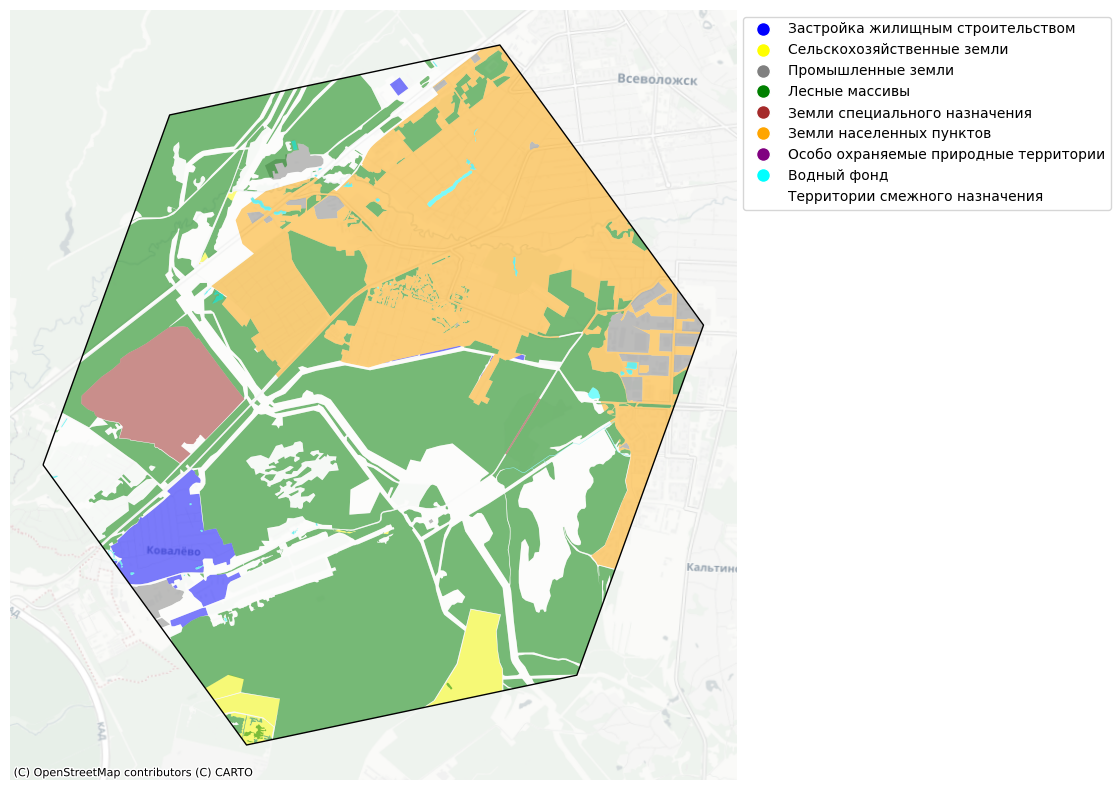

In [12]:
landuse.plot_landuse(territories.loc[[2]], landuse_data)